<a href="https://colab.research.google.com/github/kvinne-anc/Linear-Alg-Dimensionality_Reduction/blob/master/Dimensionality_Reduction_WordVecs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Vertical Line Test
1.1 Create two graphs, one that passes the vertical line test and one that does not.

1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams.update({'font.size': 14})

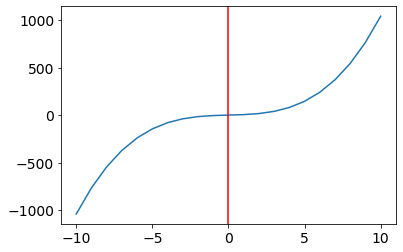

In [ ]:
x = np.arange(-10, 11)
y = x**3 + 4*x
plt.plot(x, y)  
plt.axvline(x=0, color='r');

[-1.         -0.99959992 -0.99919984 ...  0.99919984  0.99959992
  1.        ]


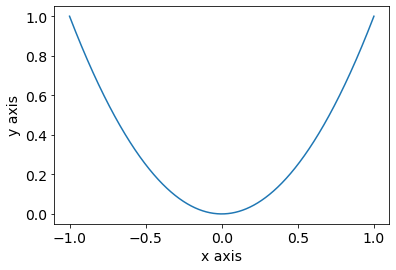

In [ ]:
from matplotlib.pyplot import *
from numpy import *
x=linspace(-1,1,5000)
y=x**2
plot(x,y)
xlabel("x axis")
ylabel("y axis")
print(x)

plt.show()

[1.         0.9992     0.99840032 ... 0.99840032 0.9992     1.        ]


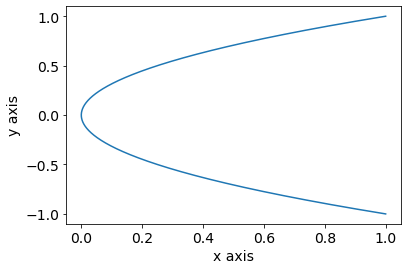

In [ ]:
from matplotlib.pyplot import *
from numpy import *
y=linspace(-1,1,5000)
x=y**2
plot(x,y)
xlabel("x axis")
ylabel("y axis")
print(x)

plt.show()

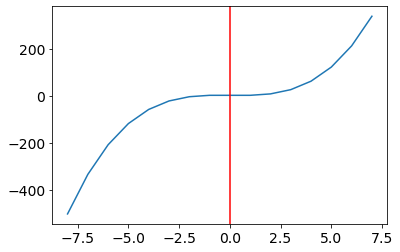

In [ ]:
x = np.arange(-8, 8)
y = x**3 + 2 - x
plt.plot(x, y)  
plt.axvline(x=0, color='r');


2. Functions as Relations
2.1 Which of the following relations are functions? Why?

$$\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}$$

In [ ]:
#1. Not
#2. Function
#3. Not
#4. Not
#5. Not

#Because same inputs mapped to multiple outputs 


3. Functions as a mapping between dimensions
3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

In [ ]:
##This questions is completely illegible - no idea how to interpret this tiny code which is a string of "unknown characters"


3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

In [ ]:
#yes

In [ ]:
f(x1,x2) = (2x1, x2 + x1, 2x2)

In [ ]:
#Test using (0,1)

In [ ]:
f(0,1) = [2(0), (1)+(0), 2(1)] = [0, 1, 2]



4. Vector Transformations
4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

$$\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}$$
4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [ ]:
#Test using (0,1) 

p(0, 1) = (0 + 3(1), (2(1) - (0))) = (3, 2) 
p(1, 0) = (1 + 3(0), (2(0) - (1))) = (1, -1)

T = 3, 2
    1,-1

#I have tried this a ton of times with different numbers and it never works! The negative on the bottom screws it up
#If it was + x1 is works, but it's not and it doesn't, the top works fine. 
#Tested this with (3, 4) and with (1, 2)

#For (1,2) plugged into the fx the result is:
#(1) + 3(2) = 7
#2(2) - (1) = 3

# But using (1,2) x the T (3,2)(1,-1):
#(1 x 3) + (2 x 2) = 7
#(1 x 1) + (2 x -1) = -1  even if thats backwards and it's (1 x -1) + (2 x 1) = 1
#I can't understand what went wrong, same issue with another set

In [ ]:
#Attempt 2:

f(1,2,3) = (4(1)+(2)+2(3), -(1)+2(2)+3(3), 5(1)+(2)-2(3)) = (4+2+6), (-1+4+9), (5+2-6) = (14,12,1)
(1,2,3) x (4,1,2),(2,-1,3),(5,-2,1) = (4+2+6), (2-2+9), (5-4+3) = (14,9,4)




5. Eigenvalues and Eigenvectors
5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

In [ ]:
#Eigenvector is a vector that does not change when undergoing transformation - it's a scalar multiple of itself
#Eigenvalue is the scale of the vector that remains unchanged  - ie. lambda


6. The Curse of Dimensionality
6.1 What are some of the challenges of working with high dimensional spaces?

6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

In [ ]:
#Too many columns in relation to rows makes it difficult to visulize the data, and we can't graph 
#or really graph the data once it goes into 4 or more dimensions

#Rule of thumb is that we want 5x as many rows as columns, otherwise we need more data for good results 



7. Principal Component Analysis
7.1 Code for loading and cleaning the 2013 national dataset from the Housing Affordability Data System (HADS) --housing data, can be found below.

Perform PCA on the processed dataset national_processed (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

In [ ]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head(3)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'


In [ ]:

# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes[:10]

CONTROL    object
AGE1        int64
METRO3     object
REGION     object
LMED        int64
FMR         int64
L30         int64
L50         int64
L80         int64
IPOV        int64
dtype: object

In [ ]:

# check for null values
national.isnull().sum().any()

False

In [ ]:

# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [ ]:

# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes[:10]

CONTROL    category
AGE1          int64
METRO3     category
REGION     category
LMED          int64
FMR           int64
L30           int64
L50           int64
L80           int64
IPOV          int64
dtype: object

In [ ]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
    national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,0,82,2,0,73738,956,15738,26213,40322,11067,2,2006,0,1,40000,-6,1,1,6,3117.394239,1,18021,1,533,1,0,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,1,0,5,1,2,0,4,4,4,4,3,1,1,1,1,1,1,1,1,1,2,0,2,0,0
1,1,50,4,2,55846,1100,17165,28604,45744,24218,4,1980,0,1,130000,-6,1,1,6,2150.725544,4,122961,1,487,1,0,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,1,0,3,1,4,0,3,4,4,3,4,2,2,2,1,3,3,3,5,3,7,0,1,0,0
2,2,53,4,2,55846,1100,13750,22897,36614,15470,4,1985,0,1,150000,-6,1,1,7,2213.789404,2,27974,1,1405,1,0,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,1,0,3,1,4,0,4,4,4,4,3,2,2,2,1,2,3,4,5,3,4,0,3,0,0
3,3,67,4,2,55846,949,13750,22897,36614,13964,3,1985,0,1,200000,-6,1,1,6,2364.585097,2,32220,1,279,1,0,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,1,0,3,1,3,0,4,4,4,4,4,2,2,2,2,2,5,6,6,4,4,0,1,0,0
4,4,26,0,2,60991,737,14801,24628,39421,15492,2,1980,0,1,-6,-6,2,100,4,2314.524902,2,96874,1,759,5,1,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,1,1,3,5,2,1,3,3,3,3,4,2,2,2,2,3,2,2,2,2,7,1,1,0,0


In [ ]:
# Now we only have numeric columns (ints and floats)
national_processed.dtypes[:10]

CONTROL    int32
AGE1       int64
METRO3      int8
REGION      int8
LMED       int64
FMR        int64
L30        int64
L50        int64
L80        int64
IPOV       int64
dtype: object

In [ ]:
national_processed.columns

Index(['CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED', 'FMR', 'L30', 'L50',
       'L80', 'IPOV', 'BEDRMS', 'BUILT', 'STATUS', 'TYPE', 'VALUE', 'VACANCY',
       'TENURE', 'NUNITS', 'ROOMS', 'WEIGHT', 'PER', 'ZINC2', 'ZADEQ', 'ZSMHC',
       'STRUCTURETYPE', 'OWNRENT', 'UTILITY', 'OTHERCOST', 'COST06', 'COST12',
       'COST08', 'COSTMED', 'TOTSAL', 'ASSISTED', 'GLMED', 'GL30', 'GL50',
       'GL80', 'APLMED', 'ABL30', 'ABL50', 'ABL80', 'ABLMED', 'BURDEN',
       'INCRELAMIPCT', 'INCRELAMICAT', 'INCRELPOVPCT', 'INCRELPOVCAT',
       'INCRELFMRPCT', 'INCRELFMRCAT', 'COST06RELAMIPCT', 'COST06RELAMICAT',
       'COST06RELPOVPCT', 'COST06RELPOVCAT', 'COST06RELFMRPCT',
       'COST06RELFMRCAT', 'COST08RELAMIPCT', 'COST08RELAMICAT',
       'COST08RELPOVPCT', 'COST08RELPOVCAT', 'COST08RELFMRPCT',
       'COST08RELFMRCAT', 'COST12RELAMIPCT', 'COST12RELAMICAT',
       'COST12RELPOVPCT', 'COST12RELPOVCAT', 'COST12RELFMRPCT',
       'COST12RELFMRCAT', 'COSTMedRELAMIPCT', 'COSTMedRELAMICAT',
      

In [ ]:
#Perform PCA on the processed dataset national_processed (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2.

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED', 'FMR', 'L30', 'L50',
       'L80', 'IPOV', 'BEDRMS', 'BUILT', 'STATUS', 'TYPE', 'VALUE', 'VACANCY',
       'TENURE', 'NUNITS', 'ROOMS', 'WEIGHT', 'PER', 'ZINC2', 'ZADEQ', 'ZSMHC',
       'STRUCTURETYPE', 'OWNRENT', 'UTILITY', 'OTHERCOST', 'COST06', 'COST12',
       'COST08', 'COSTMED', 'TOTSAL', 'ASSISTED', 'GLMED', 'GL30', 'GL50',
       'GL80', 'APLMED', 'ABL30', 'ABL50', 'ABL80', 'ABLMED', 'BURDEN',
       'INCRELAMIPCT', 'INCRELAMICAT', 'INCRELPOVPCT', 'INCRELPOVCAT',
       'INCRELFMRPCT', 'INCRELFMRCAT', 'COST06RELAMIPCT', 'COST06RELAMICAT',
       'COST06RELPOVPCT', 'COST06RELPOVCAT', 'COST06RELFMRPCT',
       'COST06RELFMRCAT', 'COST08RELAMIPCT', 'COST08RELAMICAT',
       'COST08RELPOVPCT', 'COST08RELPOVCAT', 'COST08RELFMRPCT',
       'COST08RELFMRCAT', 'COST12RELAMIPCT', 'COST12RELAMICAT',
       'COST12RELPOVPCT', 'COST12RELPOVCAT', 'COST12RELFMRPCT',
       'COST12RELFMRCAT', 'COSTMedRELAMIPCT', 'COSTMedRELAMICAT',
       'COSTMedRELPOVPCT', 'COSTMedRELPOVCAT', 'COSTMedRELFMRPCT',
       'COSTMedRELFMRCAT', 'FMTZADEQ', 'FMTMETRO3', 'FMTBUILT',
       'FMTSTRUCTURETYPE', 'FMTBEDRMS', 'FMTOWNRENT', 'FMTCOST06RELPOVCAT',
       'FMTCOST08RELPOVCAT', 'FMTCOST12RELPOVCAT', 'FMTCOSTMEDRELPOVCAT',
       'FMTINCRELPOVCAT', 'FMTCOST06RELFMRCAT', 'FMTCOST08RELFMRCAT',
       'FMTCOST12RELFMRCAT', 'FMTCOSTMEDRELFMRCAT', 'FMTINCRELFMRCAT',
       'FMTCOST06RELAMICAT', 'FMTCOST08RELAMICAT', 'FMTCOST12RELAMICAT',
       'FMTCOSTMEDRELAMICAT', 'FMTINCRELAMICAT', 'FMTASSISTED', 'FMTBURDEN',
       'FMTREGION', 'FMTSTATUS']
# Separating out the features
x = national_processed.loc[:, features].values
# Separating out the target
y = national_processed.loc[:,['METRO3']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
y

array([[2],
       [4],
       [4],
       ...,
       [1],
       [0],
       [3]], dtype=int8)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head()

,principal component 1,principal component 2
0,-2.576570,-1.376127
1,2.040643,-0.988061
2,1.215270,0.370168
3,2.821837,1.723711
4,-1.570106,-0.878362


In [ ]:
finalDf = pd.concat([principalDf, national_processed[['METRO3']]], axis = 1)

In [ ]:
finalDf.head()

,principal component 1,principal component 2,METRO3
0,-2.576570,-1.376127,2
1,2.040643,-0.988061,4
2,1.215270,0.370168,4
3,2.821837,1.723711,4
4,-1.570106,-0.878362,0


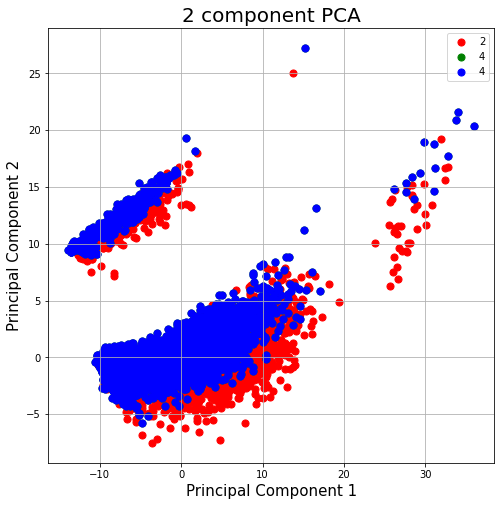

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = finalDf['METRO3']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['METRO3'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()